In [1]:
from src.environment._ENV_capture import Board
from src.agent._AGENT_capture import Agent, policy_gradient_loss
from src.learn._actor_critic import ActorCritic
from src.learn._q_learning_capture import Q_learning_capture
from src.learn._reinforce import Reinforce


# Capture chess
### Q-learning

In [2]:
# FEN = "k7/p1p1p1p1/1p1p1p1p/8/8/8/8/RNBQKBNR"

# board = Board(FEN=FEN)

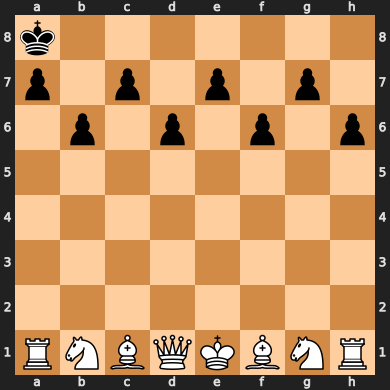

In [3]:
board.board

In [2]:
board = Board()
agent = Agent(network='conv',gamma=0.1,lr=0.07)
R = Q_learning_capture(agent,board)

iter 0


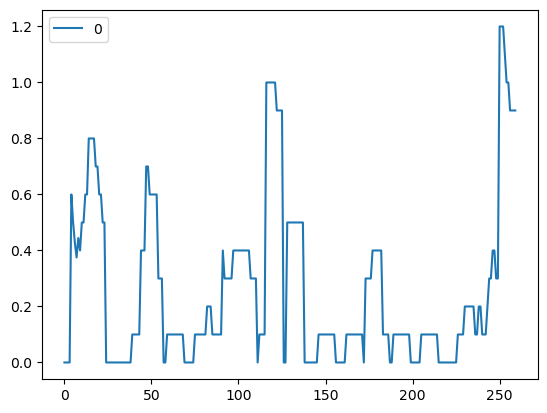

In [3]:
game = R.learn(10)

In [9]:
# Save the game in a pgn file
new_pgn = open("game.pgn", "w", encoding="utf-8")

<Axes: title={'center': 'average performance over the last 125 steps'}>

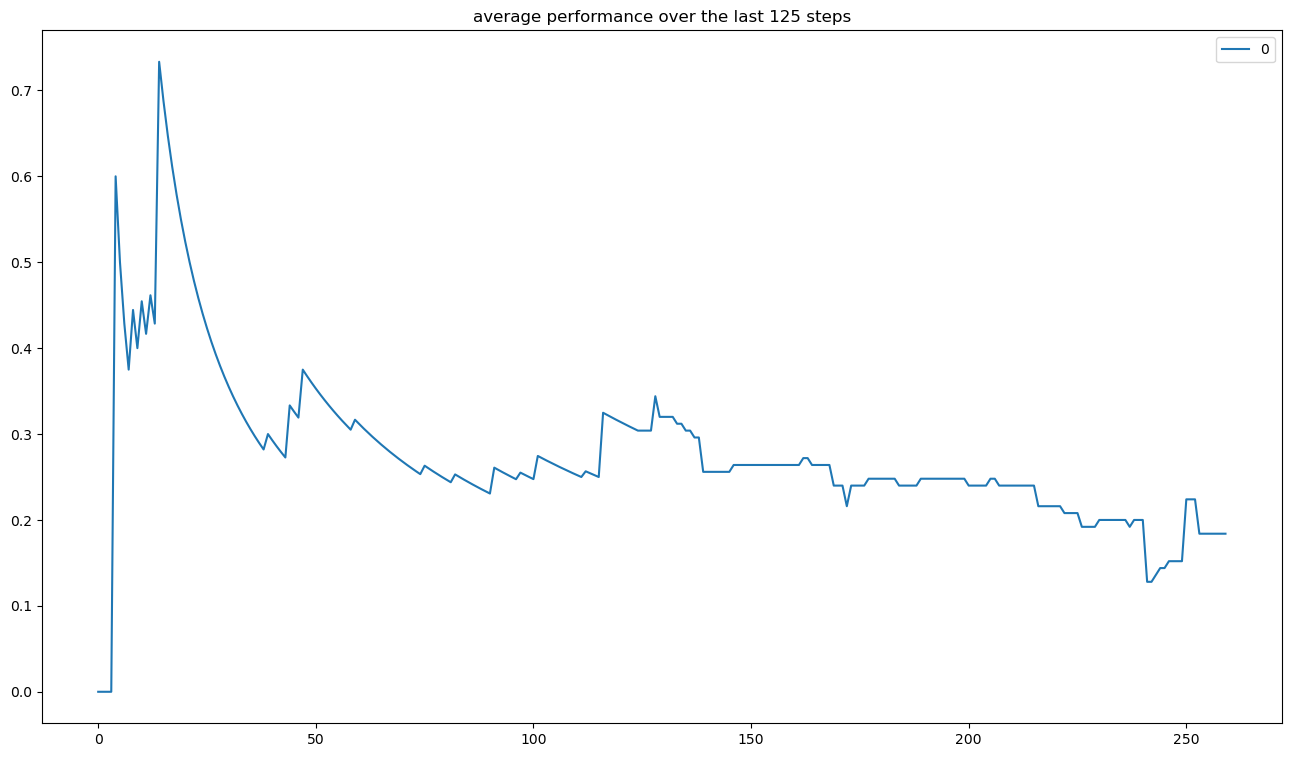

In [5]:
import pandas as pd
reward_smooth = pd.DataFrame(R.reward_trace)
reward_smooth.rolling(window=125,min_periods=0).mean().plot(figsize=(16,9),title='average performance over the last 125 steps')

In [8]:
print(game)

[Event "?"]
[Site "?"]
[Date "????.??.??"]
[Round "?"]
[White "?"]
[Black "?"]
[Result "*"]

1. Nf3 Nf6 2. c4 d6 3. Nc3 g5 4. Nb5 c6 5. Nxd6+ Qxd6 6. Nd4 Bg7 7. Nf3 Kd7 8. Nd4 Qxh2 9. Nb3 Qd6 10. Rxh7 Bf8 11. Rxf7 a5 12. Rg7 Rh4 13. Nxa5 Rh8 14. Nb3 Ng8 15. Na5 Ra6 16. Nb3 Qxd2+ 17. Kxd2 Rh4 18. Na5 b6 19. Nb3 Bb7 20. Na5 Kc8 21. Nb3 e6 22. Na5 Nh6 23. Nb3 Be7 24. Na5 Rh5 25. Nb3 Rxa2 26. Na5 Nf5 *


In [14]:
import numpy as np
import torch

board.reset()
bl = board.layer_board
bl[6, :, :] = 1/10  # Assume we are on move 10

bl_tensor = torch.from_numpy(bl).unsqueeze(0).float()  # Convert bl to a torch.Tensor

av = R.agent.get_action_values(bl_tensor)
av = av.reshape((64, 64))

p = board.board.piece_at(20)  # .symbol()

# Convert av to a NumPy array
av_np = av.detach().numpy()

white_pieces = ['P', 'N', 'B', 'R', 'Q', 'K']
black_piece = ['_', 'p', 'n', 'b', 'r', 'q', 'k']

df = pd.DataFrame(np.zeros((6, 7)))

df.index = white_pieces
df.columns = black_piece

for from_square in range(16):
    for to_square in range(30, 64):
        from_piece = board.board.piece_at(from_square).symbol()
        to_piece = board.board.piece_at(to_square)
        if to_piece:
            to_piece = to_piece.symbol()
        else:
            to_piece = '_'
        df.loc[from_piece, to_piece] = av_np[from_square, to_square]


In [15]:
df[['_','p','n','b','r','q']]

,_,p,n,b,r,q
P,0.033038,-0.027614,-0.030574,0.020613,-0.043034,-0.021848
N,0.024379,0.006002,0.034624,-0.076759,-0.011023,-0.016345
B,-0.018394,-0.006605,0.004059,-0.002829,-0.002691,-0.005410
R,-0.008477,0.040533,-0.008433,0.005678,0.038743,-0.027515
Q,0.001124,0.032319,-0.015974,0.059383,-0.001997,-0.063579
K,-0.053201,-0.009193,-0.015109,-0.019073,0.008071,-0.015453
